In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session= Session(engine)

In [10]:
#Create an inspector engine and find the name of the columns 
inspector= inspect(engine)

columns= inspector.get_columns('Station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
measurment_inspector= inspect(engine)

In [12]:
m = measurment_inspector.get_columns('Measurment')
for m_column in m:
    print(m_column['name'], m_column["type"])

In [13]:
#Inspect whats inside mesurments 
engine.execute('Select * From measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
#Find the columns name in Measurment
Measurement.__dict__.keys()

dict_keys(['__table__', '__module__', '__doc__', '_sa_class_manager', '__init__', 'id', 'station', 'date', 'prcp', 'tobs', '__mapper__'])

In [15]:
 Measurement.__dict__.keys()

dict_keys(['__table__', '__module__', '__doc__', '_sa_class_manager', '__init__', 'id', 'station', 'date', 'prcp', 'tobs', '__mapper__'])

# Exploratory Climate Analysis

In [16]:
#What is the date formate
date= session.query(Measurement.date).limit(5).all()
for dates in date:
    print(dates)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


In [17]:
#Find the First year
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [18]:
#Find the last year
last_year=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_year

('2017-08-23')

In [19]:
# Calculate the date 1 year ago from the last data point in the database
year_ago= dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"One year ago was {year_ago}")

One year ago was 2016-08-23


In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation_query= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago, Measurement.date <= '2017,8,23').\
    order_by(Measurement.date).all()

print(precipitation_query)


[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df= pd.DataFrame(precipitation_query)
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


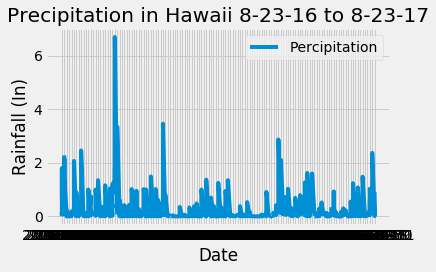

In [22]:
df=pd.DataFrame(precipitation_query)
plt.plot(df['date'], df['prcp'])
plt.title("Precipitation in Hawaii 8-23-16 to 8-23-17")
plt.xlabel('Date')
plt.ylabel('Rainfall (In)')
plt.legend(['Percipitation'])
plt.tight_layout()
plt.savefig("Image/Precipitation.png")
plt.show()

In [23]:
df.describe()

,prcp
count,754.000000
mean,0.196353
std,0.472856
min,0.000000
25%,0.000000
50%,0.040000
75%,0.160000
max,6.700000


In [24]:
# Design a query to show how many stations are available in this dataset?
count_station= engine.execute('Select Count(*) From station;').fetchall()
count_station

[(9,)]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp=[func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
session.query(*temp).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

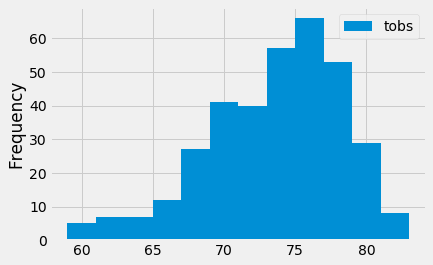

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= year_ago).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in histogram]


plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.savefig("Image/station-hist.png")
plt.show()

## Bonus Challenge Assignment

In [51]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#def calc_temps(start_date, end_date):
    #"""TMIN, TAVG, and TMAX for a list of dates.
    
    #Args:
        #start_date (string): A date string in the format %Y-%m-%d
        #end_date (string): A date string in the format %Y-%m-%d
        
    #Returns:
        #TMIN, TAVE, and TMAX
    #"""
    
    #return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        #filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

def calc_temps(start_date, end_date):
    temp_results = session.query(func.avg(Measurement.tobs),func.min(Measurement.tobs),func.max(Measurement.tobs)).\
                 filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return temp_results
temp_results_stats = calc_temps('2017-02-28','2017-03-05')
print(temp_results_stats)

[(72.02777777777777, 64.0, 78.0)]


In [52]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


Text(9.310000000000002, 0.5, 'Avg_Temp')

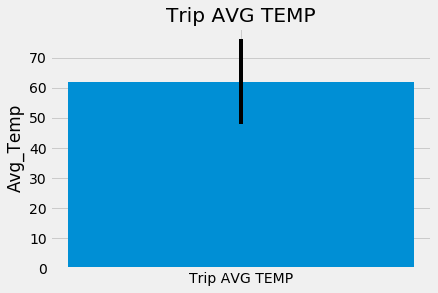

In [53]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = 'Trip AVG TEMP'
plt.bar(x=x,height= temp_stats_list[0][0],yerr =(temp_results_stats[0][2]- temp_results_stats[0][1]) )
plt.tight_layout()
plt.title('Trip AVG TEMP')
plt.ylabel('Avg_Temp')
#plt.savefig("Image/Trip_Avg_Temp.png")

In [55]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Total_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp)).\
             filter(Measurement.date>= '2016-01-01').filter(Measurement.date<'2017-01-01').\
             group_by(Measurement.station).\
             order_by(Measurement.station.desc()).all()
Total_rainfall


[('USC00519523', 30.76999999999999),
 ('USC00519397', 16.15),
 ('USC00519281', 79.89),
 ('USC00517948', 2.9700000000000006),
 ('USC00516128', 162.88000000000002),
 ('USC00514830', 27.29),
 ('USC00513117', 52.15000000000003)]

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
